In [1]:
conda install torch

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - torch

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

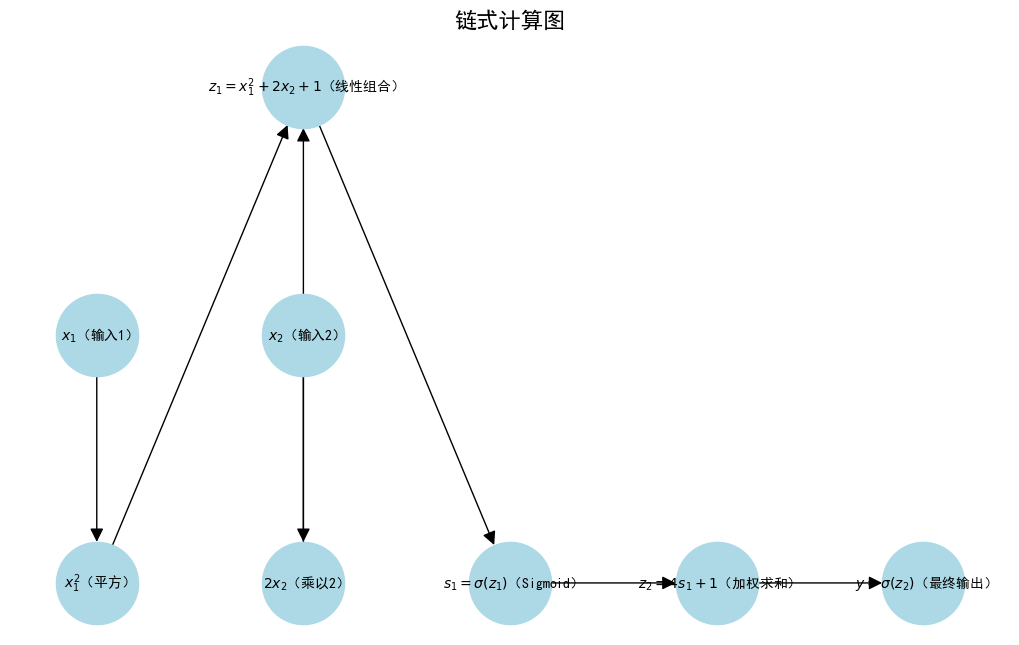

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

G = nx.DiGraph()

G.add_node("$x_1$（输入1）", pos=(0, 2))
G.add_node("$x_2$（输入2）", pos=(1, 2))


G.add_node("$x_1^2$（平方）", pos=(0, 1))
G.add_node("$2x_2$（乘以2）", pos=(1, 1))


G.add_node("$z_1=x_1^2 + 2x_2 + 1$（线性组合）", pos=(1, 3))


G.add_node("$s_1 = \sigma(z_1)$（Sigmoid）", pos=(2, 1))


G.add_node("$z_2 = 4s_1 + 1$（加权求和）", pos=(3, 1))


G.add_node("$y = \sigma(z_2)$（最终输出）", pos=(4, 1))


G.add_edge("$x_1$（输入1）", "$x_1^2$（平方）")
G.add_edge("$x_2$（输入2）", "$2x_2$（乘以2）")
G.add_edge("$x_1^2$（平方）", "$z_1=x_1^2 + 2x_2 + 1$（线性组合）")
G.add_edge("$2x_2$（乘以2）", "$z_1=x_1^2 + 2x_2 + 1$（线性组合）")


G.add_edge("$z_1=x_1^2 + 2x_2 + 1$（线性组合）", "$s_1 = \sigma(z_1)$（Sigmoid）")


G.add_edge("$s_1 = \sigma(z_1)$（Sigmoid）", "$z_2 = 4s_1 + 1$（加权求和）")


G.add_edge("$z_2 = 4s_1 + 1$（加权求和）", "$y = \sigma(z_2)$（最终输出）")


pos = nx.get_node_attributes(G, 'pos')


plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, with_labels=True, node_size=3500, 
    node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20,
    edge_color="black"
)


plt.title("链式计算图", fontsize=16)
plt.show()

In [14]:
import torch


x1 = torch.tensor(1.2, requires_grad=True)
x2 = torch.tensor(3.4, requires_grad=True)


z1 = x1**2 + 2 * x2 + 1
s1 = torch.sigmoid(z1)
z2 = 3 * s1 + s1 + 1  
y = torch.sigmoid(z2)


y.backward(retain_graph=True)


def compute_gradients(var, x):
    return torch.autograd.grad(var, x, retain_graph=True)[0]


dz1_dx1 = compute_gradients(z1, x1)
ds1_dx1 = compute_gradients(s1, x1)
dz2_dx1 = compute_gradients(z2, x1)
dy_dx1 = x1.grad

dz1_dx2 = compute_gradients(z1, x2)
ds1_dx2 = compute_gradients(s1, x2)
dz2_dx2 = compute_gradients(z2, x2)
dy_dx2 = x2.grad

print(f"∂z1/∂x1 = {dz1_dx1.item()}")
print(f"∂s1/∂x1 = {ds1_dx1.item()}")
print(f"∂z2/∂x1 = {dz2_dx1.item()}")
print(f"∂y/∂x1 = {dy_dx1.item()}")

print(f"∂z1/∂x2 = {dz1_dx2.item()}")
print(f"∂s1/∂x2 = {ds1_dx2.item()}")
print(f"∂z2/∂x2 = {dz2_dx2.item()}")
print(f"∂y/∂x2 = {dy_dx2.item()}")

∂z1/∂x1 = 2.4000000953674316
∂s1/∂x1 = 0.00023286468058358878
∂z2/∂x1 = 0.0009314587223343551
∂y/∂x1 = 6.194778052304173e-06
∂z1/∂x2 = 2.0
∂s1/∂x2 = 0.00019405389321036637
∂z2/∂x2 = 0.0007762155728414655
∂y/∂x2 = 5.162314664630685e-06


In [15]:
import torch
import torch.nn.functional as F


x1 = torch.tensor(1.2, requires_grad=True)
x2 = torch.tensor(3.4, requires_grad=True)


z1 = x1**2 + 2*x2 + 1
s1 = torch.sigmoid(z1)
s2 = torch.sigmoid(z1)
z2 = 3 * s1 + s2 + 1
y = torch.sigmoid(z2)


y.backward(retain_graph=True)


def compute_gradients(var, x):
    return torch.autograd.grad(var, x, retain_graph=True)[0]


dz1_dx1 = compute_gradients(z1, x1)
ds1_dx1 = compute_gradients(s1, x1)
dz2_dx1 = compute_gradients(z2, x1)
dy_dx1 = x1.grad

dz1_dx2 = compute_gradients(z1, x2)
ds1_dx2 = compute_gradients(s1, x2)
dz2_dx2 = compute_gradients(z2, x2)
dy_dx2 = x2.grad


print(f"z1 = {z1.item()}")
print(f"s1 = {s1.item()}")
print(f"s2 = {s2.item()}")
print(f"z2 = {z2.item()}")
print(f"y = {y.item()}")




print(f"    ∂z1/∂x1 = 2 * x1 = 2 * {x1.item()} = {dz1_dx1.item()}")
print(f"    ∂s1/∂z1 = s1 * (1 - s1) = {s1.item()} * (1 - {s1.item()}) = {ds1_dx1.item()}")
print(f"    ∂z2/∂s1 = 3")
print(f"    ∂y/∂z2 = y * (1 - y) = {y.item()} * (1 - {y.item()}) = {dy_dx1}")
print(f"    ∂y/∂x1 = ∂y/∂z2 * ∂z2/∂s1 * ∂s1/∂z1 * ∂z1/∂x1 = {dy_dx1.item()}")

print(f"    ∂z1/∂x2 = 2")
print(f"    ∂s1/∂z1 = s1 * (1 - s1) = {s1.item()} * (1 - {s1.item()}) = {ds1_dx2.item()}")
print(f"    ∂z2/∂s1 = 3")
print(f"    ∂y/∂z2 = y * (1 - y) = {y.item()} * (1 - {y.item()}) = {dy_dx2}")
print(f"    ∂y/∂x2 = ∂y/∂z2 * ∂z2/∂s1 * ∂s1/∂z1 * ∂z1/∂x2 = {dy_dx2.item()}")

print(f"\ndy/dx1 = {dy_dx1.item()}")
print(f"dy/dx2 = {dy_dx2.item()}")

z1 = 9.239999771118164
s1 = 0.9999029636383057
s2 = 0.9999029636383057
z2 = 4.999611854553223
y = 0.9933045506477356
    ∂z1/∂x1 = 2 * x1 = 2 * 1.2000000476837158 = 2.4000000953674316
    ∂s1/∂z1 = s1 * (1 - s1) = 0.9999029636383057 * (1 - 0.9999029636383057) = 0.00023286468058358878
    ∂z2/∂s1 = 3
    ∂y/∂z2 = y * (1 - y) = 0.9933045506477356 * (1 - 0.9933045506477356) = 6.194778052304173e-06
    ∂y/∂x1 = ∂y/∂z2 * ∂z2/∂s1 * ∂s1/∂z1 * ∂z1/∂x1 = 6.194778052304173e-06
    ∂z1/∂x2 = 2
    ∂s1/∂z1 = s1 * (1 - s1) = 0.9999029636383057 * (1 - 0.9999029636383057) = 0.00019405389321036637
    ∂z2/∂s1 = 3
    ∂y/∂z2 = y * (1 - y) = 0.9933045506477356 * (1 - 0.9933045506477356) = 5.162314664630685e-06
    ∂y/∂x2 = ∂y/∂z2 * ∂z2/∂s1 * ∂s1/∂z1 * ∂z1/∂x2 = 5.162314664630685e-06

dy/dx1 = 6.194778052304173e-06
dy/dx2 = 5.162314664630685e-06
